In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_linalol_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Linalool
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5000
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.5000
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.5000
3,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.5000
4,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42971,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625
74996,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625
74997,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625
74998,42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0625


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Linalool', 'index'], axis = 1)
y = df_knn[['X..Linalool']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.5   ],
       [0.5   ],
       [0.5   ],
       ...,
       [0.0625],
       [0.0625],
       [0.0625]])

<AxesSubplot:ylabel='Count'>

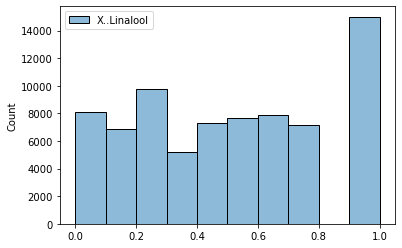

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.06653090841218966

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.014921909091292231

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.12215526632647579

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.9102200756920835

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8503285757911546

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([1.09777439e-01, 9.30466017e-02, 8.28068864e-02, 8.53676149e-02,
       8.99831487e-02, 2.32115888e-01, 1.23705095e-03, 1.68974044e-03,
       3.53338678e-05, 1.64387539e-03, 7.42423859e-03, 4.58968924e-07,
       9.47530962e-03, 3.73449996e-05, 1.42895111e-03, 6.07663520e-03,
       6.73486225e-03, 8.03839893e-03, 4.87808357e-07, 7.41079242e-03,
       7.88838607e-08, 1.51056945e-07, 4.24668357e-03, 7.43025968e-03,
       1.25279658e-02, 9.13669300e-04, 4.96326549e-03, 3.03170672e-05,
       1.32229979e-07, 1.59634966e-03, 1.18461165e-02, 7.73845047e-08,
       1.25383859e-02, 0.00000000e+00, 0.00000000e+00, 5.01720651e-03,
       1.12296613e-02, 6.72177065e-03, 7.66906194e-04, 7.08579858e-04,
       3.87517485e-05, 3.17883241e-03, 2.79402546e-04, 1.14059142e-02,
       1.30507682e-03, 2.40334472e-02, 1.76793712e-03, 1.45952164e-03,
       3.98597430e-03, 2.15128801e-03, 9.05501928e-03, 1.76174897e-02,
       4.56448058e-03, 4.63766632e-04, 3.97445584e-03, 5.90394487e-04,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,happy,relaxed,sleepy,cheese,earthy,honey,orange,pine
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,1,0,0,0,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,1,0,1,0,0,0,0
3,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,1,0,1,0,0,0,0
4,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.184573,-0.137296,-0.095301,0.181735,-0.042683,0,1,0,1,0,0,0,0,0
74996,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,1,1,0,0,0,0,0
74997,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,1,1,0,0,0,0,0
74998,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,1,1,0,0,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'happy',
 'relaxed',
 'sleepy',
 'cheese',
 'earthy',
 'honey',
 'orange',
 'pine']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_linalol.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_linalol.pkl")

['selector_knn_lsa_elbow_linalol.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.07051097393925518

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.016265979259094152

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1275381482502163

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8993920673849276

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8374945328292327

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 7}

kNN (after hyperparameter tuning)

In [38]:
knreg_ht = KNeighborsRegressor(n_neighbors = 7, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [39]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03450450004009578

In [40]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.09664420634353334

In [41]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9832400670510981

In [42]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.9066875891409815

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [43]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [44]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_linalol.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_linalol.pkl")

['y_test_knreg_lsa_elbow_linalol.pkl']

In [45]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.03457034932111185

In [46]:
mean_squared_error(y_test, y_pred_knreg_test)

0.009453361845134596

In [47]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.09722840040407225

In [48]:
r2_score(y_test, y_pred_knreg_test)

0.9060288263473391

In [49]:
y_test

,X..Linalool
11591,0.406250
52020,0.271635
34666,0.687500
22169,0.906250
23049,0.906250
...,...
60863,0.359375
32316,0.687500
60933,0.359375
43206,1.000000


In [50]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

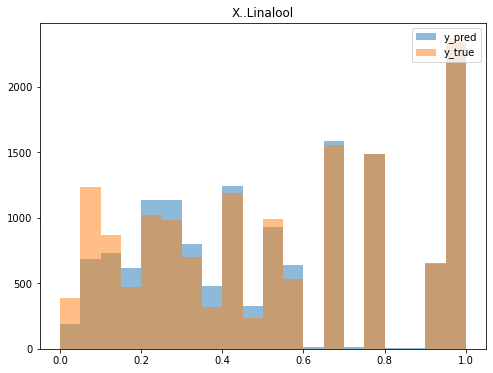

<Figure size 432x288 with 0 Axes>

In [51]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Linalool"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_linalol.png')

Pearson R

In [52]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.953
P-value: 0.000


<AxesSubplot:>

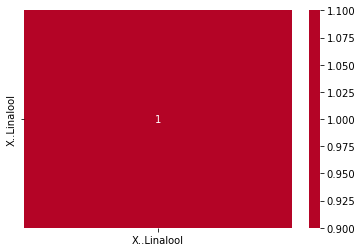

In [53]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)